# Analytes, Signals, and Noise
## Learning Objectives
- Define “analyte”.
- Describe the differences between qualitative and quantitative analysis. 
- Based on results for standards that each contain an analyte at a known concentration, construct a calibration curve and determine a response function.
- Calculate the concentration of an analyte in a sample, based on analysis of a sample and multiple external standards.
- Describe the differences between deterministic and indeterministic errors.
- Based on results for replicate measurements using the same method, calculate the noise and the limit of detection of the method.

## Fundamentals of Analytical Chemistry
Analytical chemistry is focused on characterizing the composition of matter:
- *Analyte*: the molecule or species in a sample that is being analyzed.
- *Qualitative analysis*: is the analyte present in the sample?
- *Quantitative analysis*: how much of the analyte is present in the sample?
  
Analytical chemistry research is usually focused on improving, extending, and/or characterizing methods for chemical analysis. For example:
- Developing a new measurement technique.
- Applying a measurement technique to a new analyte.
- Applying a measurement technique to a new type of sample (e.g., fish from a lake versus lake water) or in a new setting (e.g., field-based versus laboratory-based measurements).
- Developing and validating a protocol for use in routine chemical analysis (rather than performing routine chemical analysis using an established protocol).


## Response Function
A response function relates the $signal$ (the observable of a measurement) to the concentration or amount of an analyte in a sample. In the simplest case:  
$$Signal = K[analyte]$$  

where $K$ is the response factor, which is how the signal responds to changes in the concentration or amount of an analyte in a sample. For example, in UV-Vis spectrophotometry the absorbance is the product of the molar absorptivity ($\varepsilon$), path length, and concentration of the analyte:  
$$Absorbance = \varepsilon \cdot l \cdot [analyte]$$

Note that the response function for a measurement will depend on the protocol used to perform the measurement. The protocol includes all steps involved in the sampling (how the samples are acquired), sample preparation (how the sample is treated and manipulated prior to analysis), and the actual measurement.




## Quantitative Analysis With External Standards
The simplest way to characterize the response function for a protocol is to perform the protocol on **external standards**, which are solutions that were prepared with a known amount of the analyte. The standards are then analyzed and the results are plotted in order to determine the response function.

**Example 1.** Using external standards to determine a response function. Standards solutions were prepared that had analyte concentrations ranging from 0.0000 to 0.0010 M. Those standard solutions were then analyzed individually using UV-vis spectrophotometry.

| Concentration / mM | Absorbance|
| ---: | ---: |
| 0.00 | 0.00 |
| 0.20 | 0.22|
| 0.40 | 0.44 |
| 0.60 | 0.66 |
| 0.80 | 0.88 |
| 1.00 | 1.10 | 

In [2]:
"""
This block of code enables and formats the plots shown below.
"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = "Open Sans"

mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['lines.markersize'] = 10.0
mpl.rcParams['axes.linewidth'] = 3.0
mpl.rcParams['axes.labelweight'] = "bold"
mpl.rcParams['markers.fillstyle'] = "none"

mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = mpl.rcParams['xtick.major.size']
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.minor.width'] = mpl.rcParams['xtick.major.width']
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['ytick.major.size'] = mpl.rcParams['xtick.major.size']
mpl.rcParams['ytick.major.width'] = mpl.rcParams['xtick.major.width']
mpl.rcParams['ytick.minor.width'] = mpl.rcParams['xtick.minor.width']

mpl.rcParams['legend.fancybox'] = True

mpl.rcParams['axes.titlesize'] = mpl.rcParams['font.size']
mpl.rcParams['axes.titleweight'] = mpl.rcParams['axes.labelweight']

# Generate a color palate.
colors = mpl.cm.magma(np.linspace(0,1,5))

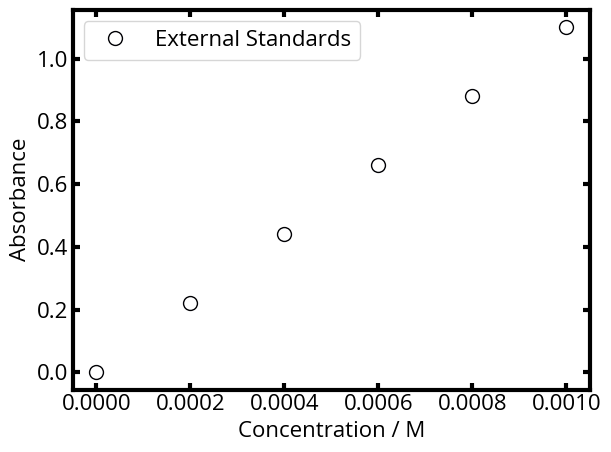

In [3]:
# Plotting the results for the external standards.
concentration = np.arange(0.0,0.0011,0.0002)
absorbance = np.array([0., 0.22, 0.44, 0.66, 0.88, 1.1])

fig, ax = plt.subplots(tight_layout=True) 
ax.plot(concentration,absorbance,c=colors[0],marker='o',ls='',label='External Standards')

ax.set_xlabel('Concentration / M')
ax.set_ylabel('Absorbance')
ax.legend(loc='upper left')
plt.show()


The slope is: 1100.0 M^-1
The intercept is: -1.812986607347358e-16


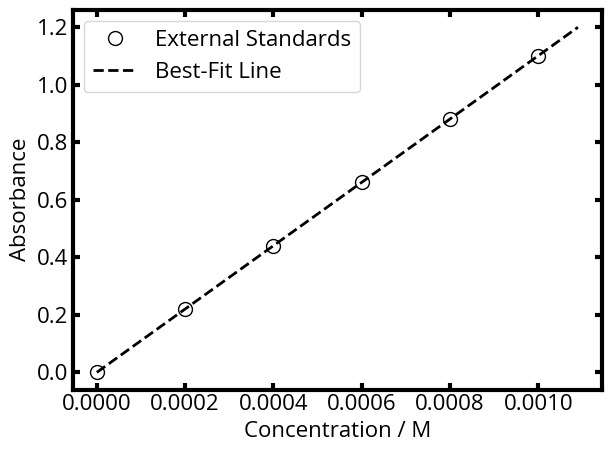

In [4]:
# Plotting the results for the external standards.
fig, ax = plt.subplots(tight_layout=True) 
ax.plot(concentration,absorbance,c=colors[0],marker='o',ls='',label='External Standards')

# Performing linear regression to determine the response function.
coefficients = np.polynomial.polynomial.polyfit(concentration,absorbance,1)
intercept, slope = coefficients
print('The slope is: ' + str(slope) + ' M^-1')
print('The intercept is: ' + str(intercept))
x = np.arange(0.0,0.0011,0.00001)
y = np.polynomial.polynomial.polyval(x,coefficients)
ax.plot(x,y,c=colors[0],marker='',ls='--',label='Best-Fit Line')

ax.set_xlabel('Concentration / M')
ax.set_ylabel('Absorbance')
ax.legend(loc='upper left')
plt.show()

**Figure 1.** An example of a calibration plot determined from results for external standards. Here, five external standards of known analyte concentration were analyzed using the same method. The signal was plotted as a function of analyte concentration. Linear regression of these data was used to determine the line-of-best fit, which is the response function for the method.

## Calculate the concentration of an analyte in a sample, based on analysis of a sample and multiple external standards.
The objective of quantitative analysis is to determine how much of the analyte is present in the sample. From analysis of the external standards of known analyte concentration, we found the response function for the method:
$$signal = slope \cdot [analyte] + intercept$$
By rearranging the response function and substituting the signal measured for a sample, we can therefore find the concentration of an analyte in that sample:
$$[analyte] = \frac{signal - intercept}{slope}$$ 

In [5]:
signal_sample = 0.773
concentration_sample = (signal_sample-intercept)/slope
print('The concentration of the analyte in the sample is: ' + str(concentration_sample) + ' M.')

The concentration of the analyte in the sample is: 0.0007027272727272729 M.


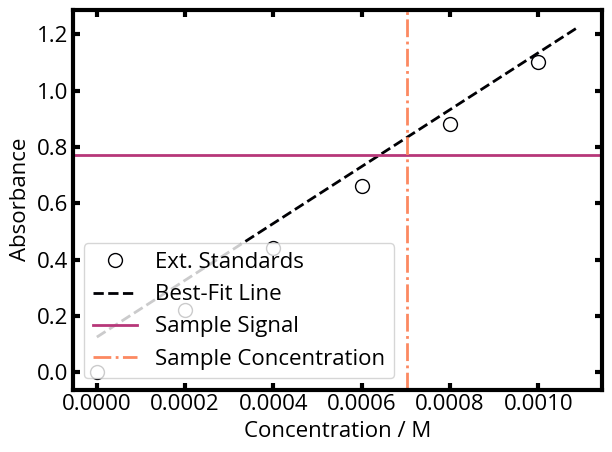

In [68]:
fig, ax = plt.subplots(tight_layout=True) 

# Replotting the response function.
ax.plot(concentration,absorbance,c=colors[0],marker='o',ls='',label='Ext. Standards')
ax.plot(x,y,c=colors[0],marker='',ls='--',label='Best-Fit Line')

# Plotting a horizontal line corresponding the the signal measured for the sample.
ax.axhline(y=signal_sample, c=colors[2],ls='-',marker=None, label='Sample Signal')

# Plotting a vertical line that passes through the intersection between the horizontal line 
# and the response function.
ax.axvline(x=concentration_sample, c=colors[3],ls='-.',marker=None, label='Sample Concentration')

ax.set_xlabel('Concentration / M')
ax.set_ylabel('Absorbance')
ax.legend(loc='lower left')
plt.show()

**Figure 2.** Determining the concentration of the analyte in a sample, based on a calibration plot. Here, analysis of a sample containing an analyte with an unknown concentration yielded a signal of 0.773. Drawing a horizontal line from the y-axis to the response function and a vertical line to the x-axis indicates that the concentration of the analyte in the sample was 7 mM. Alternatively, the analyst could have replaced S in the response function with the experimental value of 0.773 and solved for the concentration of the analyte. 

## Errors in Chemical Measurements
### Systematic Errors
**Systematic errors** create **bias** in a chemical measurement. A bias means that the values determined are consistently higher or consistently lower than the true value. Systematic errors are usually either constant (i.e., the magnitude of the bias is constant and independent of the concentration of the analyte) or  proportional (i.e., the magnitude of the bias is proportional to the concentration of the analyte). Systematic errors are also referred to as determinate errors.

The slope is: 1100.0000000000002 M^-1
The intercept is: 0.16999999999999985


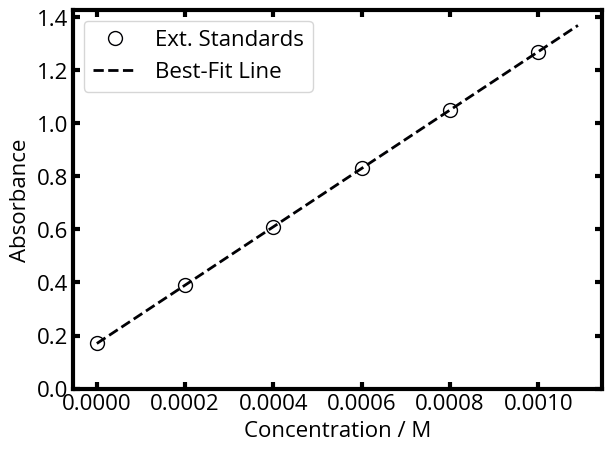

In [7]:
biased_absorbance = absorbance + 0.17

fig, ax = plt.subplots(tight_layout=True) 
ax.plot(concentration,biased_absorbance,c=colors[0],marker='o',ls='',label='Ext. Standards')

coefficients = np.polynomial.polynomial.polyfit(concentration,biased_absorbance,1)
intercept, slope = coefficients
print('The slope is: ' + str(slope) + ' M^-1')
print('The intercept is: ' + str(intercept))
y = np.polynomial.polynomial.polyval(x,coefficients)
ax.plot(x,y,c=colors[0],marker='',ls='--',label='Best-Fit Line')

ax.set_xlabel('Concentration / M')
ax.set_ylabel('Absorbance')
ax.set_ylim(bottom=0.)
ax.legend(loc='upper left')
plt.show()

**Figure 3.** A constant bias in the method causes the measured signal to be systematically larger than that expected based only on the concentration of the standards and the response factor $K$. Adding an additional term $b$ to the response function accounts for that constant bias. Interpreting signals measured using this method with the full response function, $Signal =K[analyte]+b$, will account for this bias. 

### Random Errors
*Random errors* reduce the precision of a chemical measurement. Random errors cause the determined values to vary from the true value, but there is an equal chance for the difference between the determined value and the true value to be positive or negative. Random errors are also referred to as indeterministic errors.

The slope of the high-speed method is: 1008.959789284045 M^-1
The intercept of the high-speed method is: 0.125092607030509


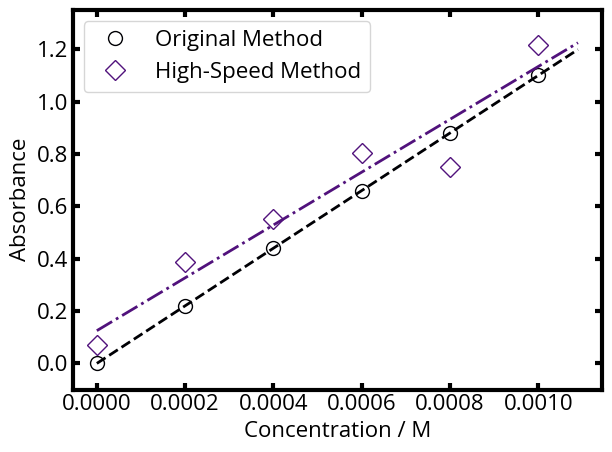

In [8]:
original_method = absorbance

# Randomly sample noise from a normal distribution with a standard deviation of 0.1.
noise = np.random.default_rng().normal(0.0, 0.1, len(original_method))
high_speed_method = original_method + noise

fig, ax = plt.subplots(tight_layout=True) 
ax.plot(concentration,original_method,c=colors[0],marker='o',ls='',label='Original Method')
coefficients = np.polynomial.polynomial.polyfit(concentration,original_method,1)
y = np.polynomial.polynomial.polyval(x,coefficients)
ax.plot(x,y,c=colors[0],marker='',ls='--')

ax.plot(concentration,high_speed_method,c=colors[1],marker='D',ls='',label='High-Speed Method')
coefficients = np.polynomial.polynomial.polyfit(concentration,high_speed_method,1)
slope = coefficients[1]
intercept = coefficients[0]
print('The slope of the high-speed method is: ' + str(slope) + ' M^-1')
print('The intercept of the high-speed method is: ' + str(intercept))
y = np.polynomial.polynomial.polyval(x,coefficients)
ax.plot(x,y,c=colors[1],marker='',ls='-.')

ax.set_xlabel('Concentration / M')
ax.set_ylabel('Absorbance')
ax.set_ylim(bottom=-0.1,top=1.35)
ax.legend(loc='upper left')
plt.show()

**Figure 4.** An alternative method was used to analyze the same external standards. This method is much faster, which enables the analyst to analyze more samples per hous, but has greater random errors. Note that the random error can yield values that are greater than or less than the higher-precision measurements, but linear regression of both sets of calibration data yield similar response functions. Based on a single measurement of a sample with unknown analyte concentration using the high-speed method, the precision of the determined concentration will be less than that determined using the original method (i.e., a wider range of concentration values will be consistent with the measurement).

## Characterizing the Noise in a Chemical Measurement
*Noise* is the instantaneous, rapid fluctuations in a measurement signal. When you look at a chromatogram or spectral output, noise appears as those rapid up-and-down variations in your baseline. Noise is what makes the baseline look "fuzzy" rather than perfectly smooth.

**Example.** The high-speed method is used to repeatedly measure a blank, which does not contain the analyte. The high-speed method yields two observations per second. 

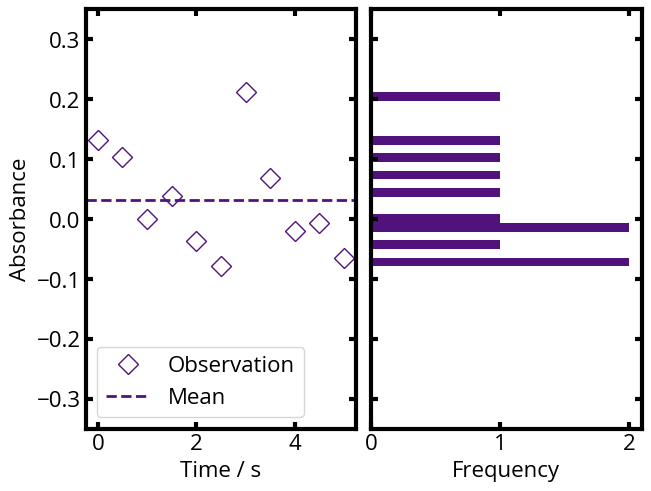

In [19]:
time = np.arange(0.0,5.05,0.5)
signal = np.random.default_rng().normal(0.0, 0.1, len(time))

fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)
ax1.plot(time,signal,c=colors[1],marker='D',ls='',label='Observation')
ax1.axhline(y=np.average(signal), c=colors[1],ls='--',marker=None, label='Mean')
ax2.hist(signal, bins=20, color=colors[1], orientation="horizontal")

ax1.set_xlabel('Time / s')
ax2.set_xlabel('Frequency')
ax1.set_ylabel('Absorbance')
ax1.set_ylim(bottom=-0.35,top=0.35)
ax1.legend(loc='lower left')
plt.show()


**Figure 5.** high-speed method is used to repeatedly measure a blank, which does not contain the analyte. The high-speed method yields two observations per second. The *left panel* shows each observation obtained using the high-speed method; the mean of those observations is shown with a dashed horizontal line. The *right panel* shows a histogram of those observations.

## Normal Distributions
In many experiments, noise follows a normal distribution:
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2} } e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
where $\mu$ is the central value of the distribution and $\sigma$ is the standard deviation of the distrubtion.

![normal distribution](./images/distribution.png)
From Wikimedia Commons.

## Qualitative analysis: is the analyte present in the sample?
The limit of detection is the lowest concentration or amount of analyte that can be reliably distinguished from the blank or background signal. "Reliably" is the key word here - we need statistical confidence that we're seeing real signal, not just noise.

The most common definition in analytical chemistry is:
$$LOD = \frac {3 \cdot \sigma}{K} $$
where:
- $\sigma$ is the standard deviation of the signal for the blank.
- $K$ is the response factor of the method (the slope of the calibration plot), which has units analogous to $M^{-1}$.
- The factor of 3 gives us 99.87% confidence that a signal at this level represents real analyte (this is for a one-tailed significance test).

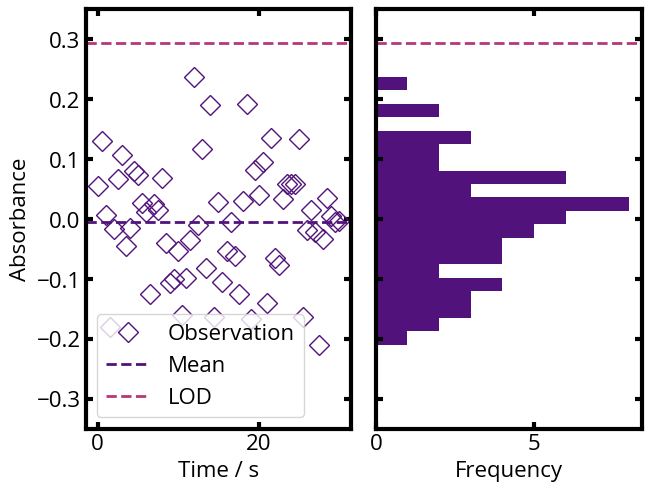

In [64]:
# Visualizing the limit of detections (LOD).

time = np.arange(0.0,30.05,0.5)
signal = np.random.default_rng().normal(0.0, 0.1, len(time))

# Note that I am calculating the standard deviation of the sample 
# of observations that were made for the blank.
s = np.std(signal,ddof=1)

fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)
ax1.plot(time,signal,c=colors[1],marker='D',ls='',label='Observation')
ax1.axhline(y=np.average(signal), c=colors[1],ls='--',marker=None, label='Mean')
ax1.axhline(y=3*s, c=colors[2],ls='--',marker=None, label='LOD')
ax2.axhline(y=3*s, c=colors[2],ls='--',marker=None, label='LOD')
ax2.hist(signal, bins=20, color=colors[1], orientation="horizontal")

ax1.set_xlabel('Time / s')
ax2.set_xlabel('Frequency')
ax1.set_ylabel('Absorbance')
ax1.set_ylim(bottom=-0.35,top=0.35)
ax1.legend(loc='lower left')
plt.show()

### Reflection Questions
Using a $3 \cdot \sigma$ limit of detection, how many false positives would you expect for 1000 observations? Justify your answer.

## Possible Outcomes for a Qualitative Assay
Qualitative assays yield either a positive or negative result.

| | analyte present in sample | analyte absent from sample |
| --- | :---: | :---: |
| **method reports positive test** | true positive | false positive |
| **method reports negative test** | false negative | true positive |
| | *sensitivity depends on this column* | *selectivity depends on this column* |

**Sensitivity** is the fraction of the true positives that are correctly identified.
$$ sensitivity = \frac {true \: positives}{true \: positives + false \: negatives}$$

**Selectivity** is the true negative rate, which is also called the specificity.
$$ selectivity = \frac {true \: negatives}{true \: negatives + false \: positives}$$

### Reflection Questions
How will the definition of LOD affect the sensitivity and selectivity of a qualitative assay?